In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [2]:
df = pd.read_csv('/Users/kirtan/Downloads/resume.csv')

In [3]:
df.head()

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high


In [4]:
df.shape

(4870, 30)

In [5]:
df.isnull().sum()

job_ad_id                    0
job_city                     0
job_industry                 0
job_type                     0
job_fed_contractor        1768
job_equal_opp_employer       0
job_ownership                0
job_req_any                  0
job_req_communication        0
job_req_education            0
job_req_min_experience    2746
job_req_computer             0
job_req_organization         0
job_req_school               0
received_callback            0
firstname                    0
race                         0
gender                       0
years_college                0
college_degree               0
honors                       0
worked_during_school         0
years_experience             0
computer_skills              0
special_skills               0
volunteer                    0
military                     0
employment_holes             0
has_email_address            0
resume_quality               0
dtype: int64

In [6]:
#DROPPING NULL VALUES
df = df.drop(['job_ad_id','job_fed_contractor','job_req_min_experience'],axis=1)

In [7]:
df.isnull().sum()

job_city                  0
job_industry              0
job_type                  0
job_equal_opp_employer    0
job_ownership             0
job_req_any               0
job_req_communication     0
job_req_education         0
job_req_computer          0
job_req_organization      0
job_req_school            0
received_callback         0
firstname                 0
race                      0
gender                    0
years_college             0
college_degree            0
honors                    0
worked_during_school      0
years_experience          0
computer_skills           0
special_skills            0
volunteer                 0
military                  0
employment_holes          0
has_email_address         0
resume_quality            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   job_city                4870 non-null   object
 1   job_industry            4870 non-null   object
 2   job_type                4870 non-null   object
 3   job_equal_opp_employer  4870 non-null   int64 
 4   job_ownership           4870 non-null   object
 5   job_req_any             4870 non-null   int64 
 6   job_req_communication   4870 non-null   int64 
 7   job_req_education       4870 non-null   int64 
 8   job_req_computer        4870 non-null   int64 
 9   job_req_organization    4870 non-null   int64 
 10  job_req_school          4870 non-null   object
 11  received_callback       4870 non-null   int64 
 12  firstname               4870 non-null   object
 13  race                    4870 non-null   object
 14  gender                  4870 non-null   object
 15  year

In [9]:
#DIVIDING THE COLUMNS INTO CATEGORICAL AND NUMERICAL LISTS
Categorical = []
Numerical = []

In [10]:
for col in df.columns:
    if df[col].dtype == 'object':
        Categorical.append(col)
    else:
        Numerical.append(col)

In [11]:
Categorical

['job_city',
 'job_industry',
 'job_type',
 'job_ownership',
 'job_req_school',
 'firstname',
 'race',
 'gender',
 'resume_quality']

In [12]:
Numerical

['job_equal_opp_employer',
 'job_req_any',
 'job_req_communication',
 'job_req_education',
 'job_req_computer',
 'job_req_organization',
 'received_callback',
 'years_college',
 'college_degree',
 'honors',
 'worked_during_school',
 'years_experience',
 'computer_skills',
 'special_skills',
 'volunteer',
 'military',
 'employment_holes',
 'has_email_address']

In [13]:
for col in Categorical:
    print(df[col].unique())

['Chicago' 'Boston']
['manufacturing' 'other_service' 'wholesale_and_retail_trade'
 'business_and_personal_service' 'finance_insurance_real_estate'
 'transportation_communication']
['supervisor' 'secretary' 'sales_rep' 'retail_sales' 'manager' 'clerical']
['unknown' 'nonprofit' 'private' 'public']
['none_listed' 'some_college' 'college' 'high_school_grad']
['Allison' 'Kristen' 'Lakisha' 'Latonya' 'Carrie' 'Jay' 'Jill' 'Kenya'
 'Tyrone' 'Aisha' 'Geoffrey' 'Matthew' 'Tamika' 'Leroy' 'Todd' 'Greg'
 'Keisha' 'Brad' 'Laurie' 'Meredith' 'Anne' 'Emily' 'Latoya' 'Ebony'
 'Brendan' 'Hakim' 'Jamal' 'Neil' 'Tremayne' 'Brett' 'Darnell' 'Sarah'
 'Jermaine' 'Tanisha' 'Rasheed' 'Kareem']
['white' 'black']
['f' 'm']
['low' 'high']


# Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
Le = LabelEncoder()

In [16]:
#IF COLUMN HAS LESS THAN 3 UNIQUE CATEGORICAL VALUES THEN LABEL ENCODING, ELSE FREQUENCY ENCODING WILL BE PERFORMED
for col in Categorical:
    if len(df[col].unique()) <= 3:
        df[col] = Le.fit_transform(df[col])
    else:
        freq_encoding = df[col].value_counts(normalize=True).to_dict()
        df[col] = df[col].map(freq_encoding)

        

In [17]:
df.head()

,job_city,job_industry,job_type,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,0,6,1,0,0,0,1,0,1
1,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,1,6,1,0,1,1,0,1,0
2,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,1,6,1,0,0,0,0,0,1
3,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,0,6,1,1,1,0,1,1,0
4,1,0.319918,0.332854,1,0.065298,1,0,0,1,1,...,0,1,22,1,0,0,0,0,1,0


# Data Visualization

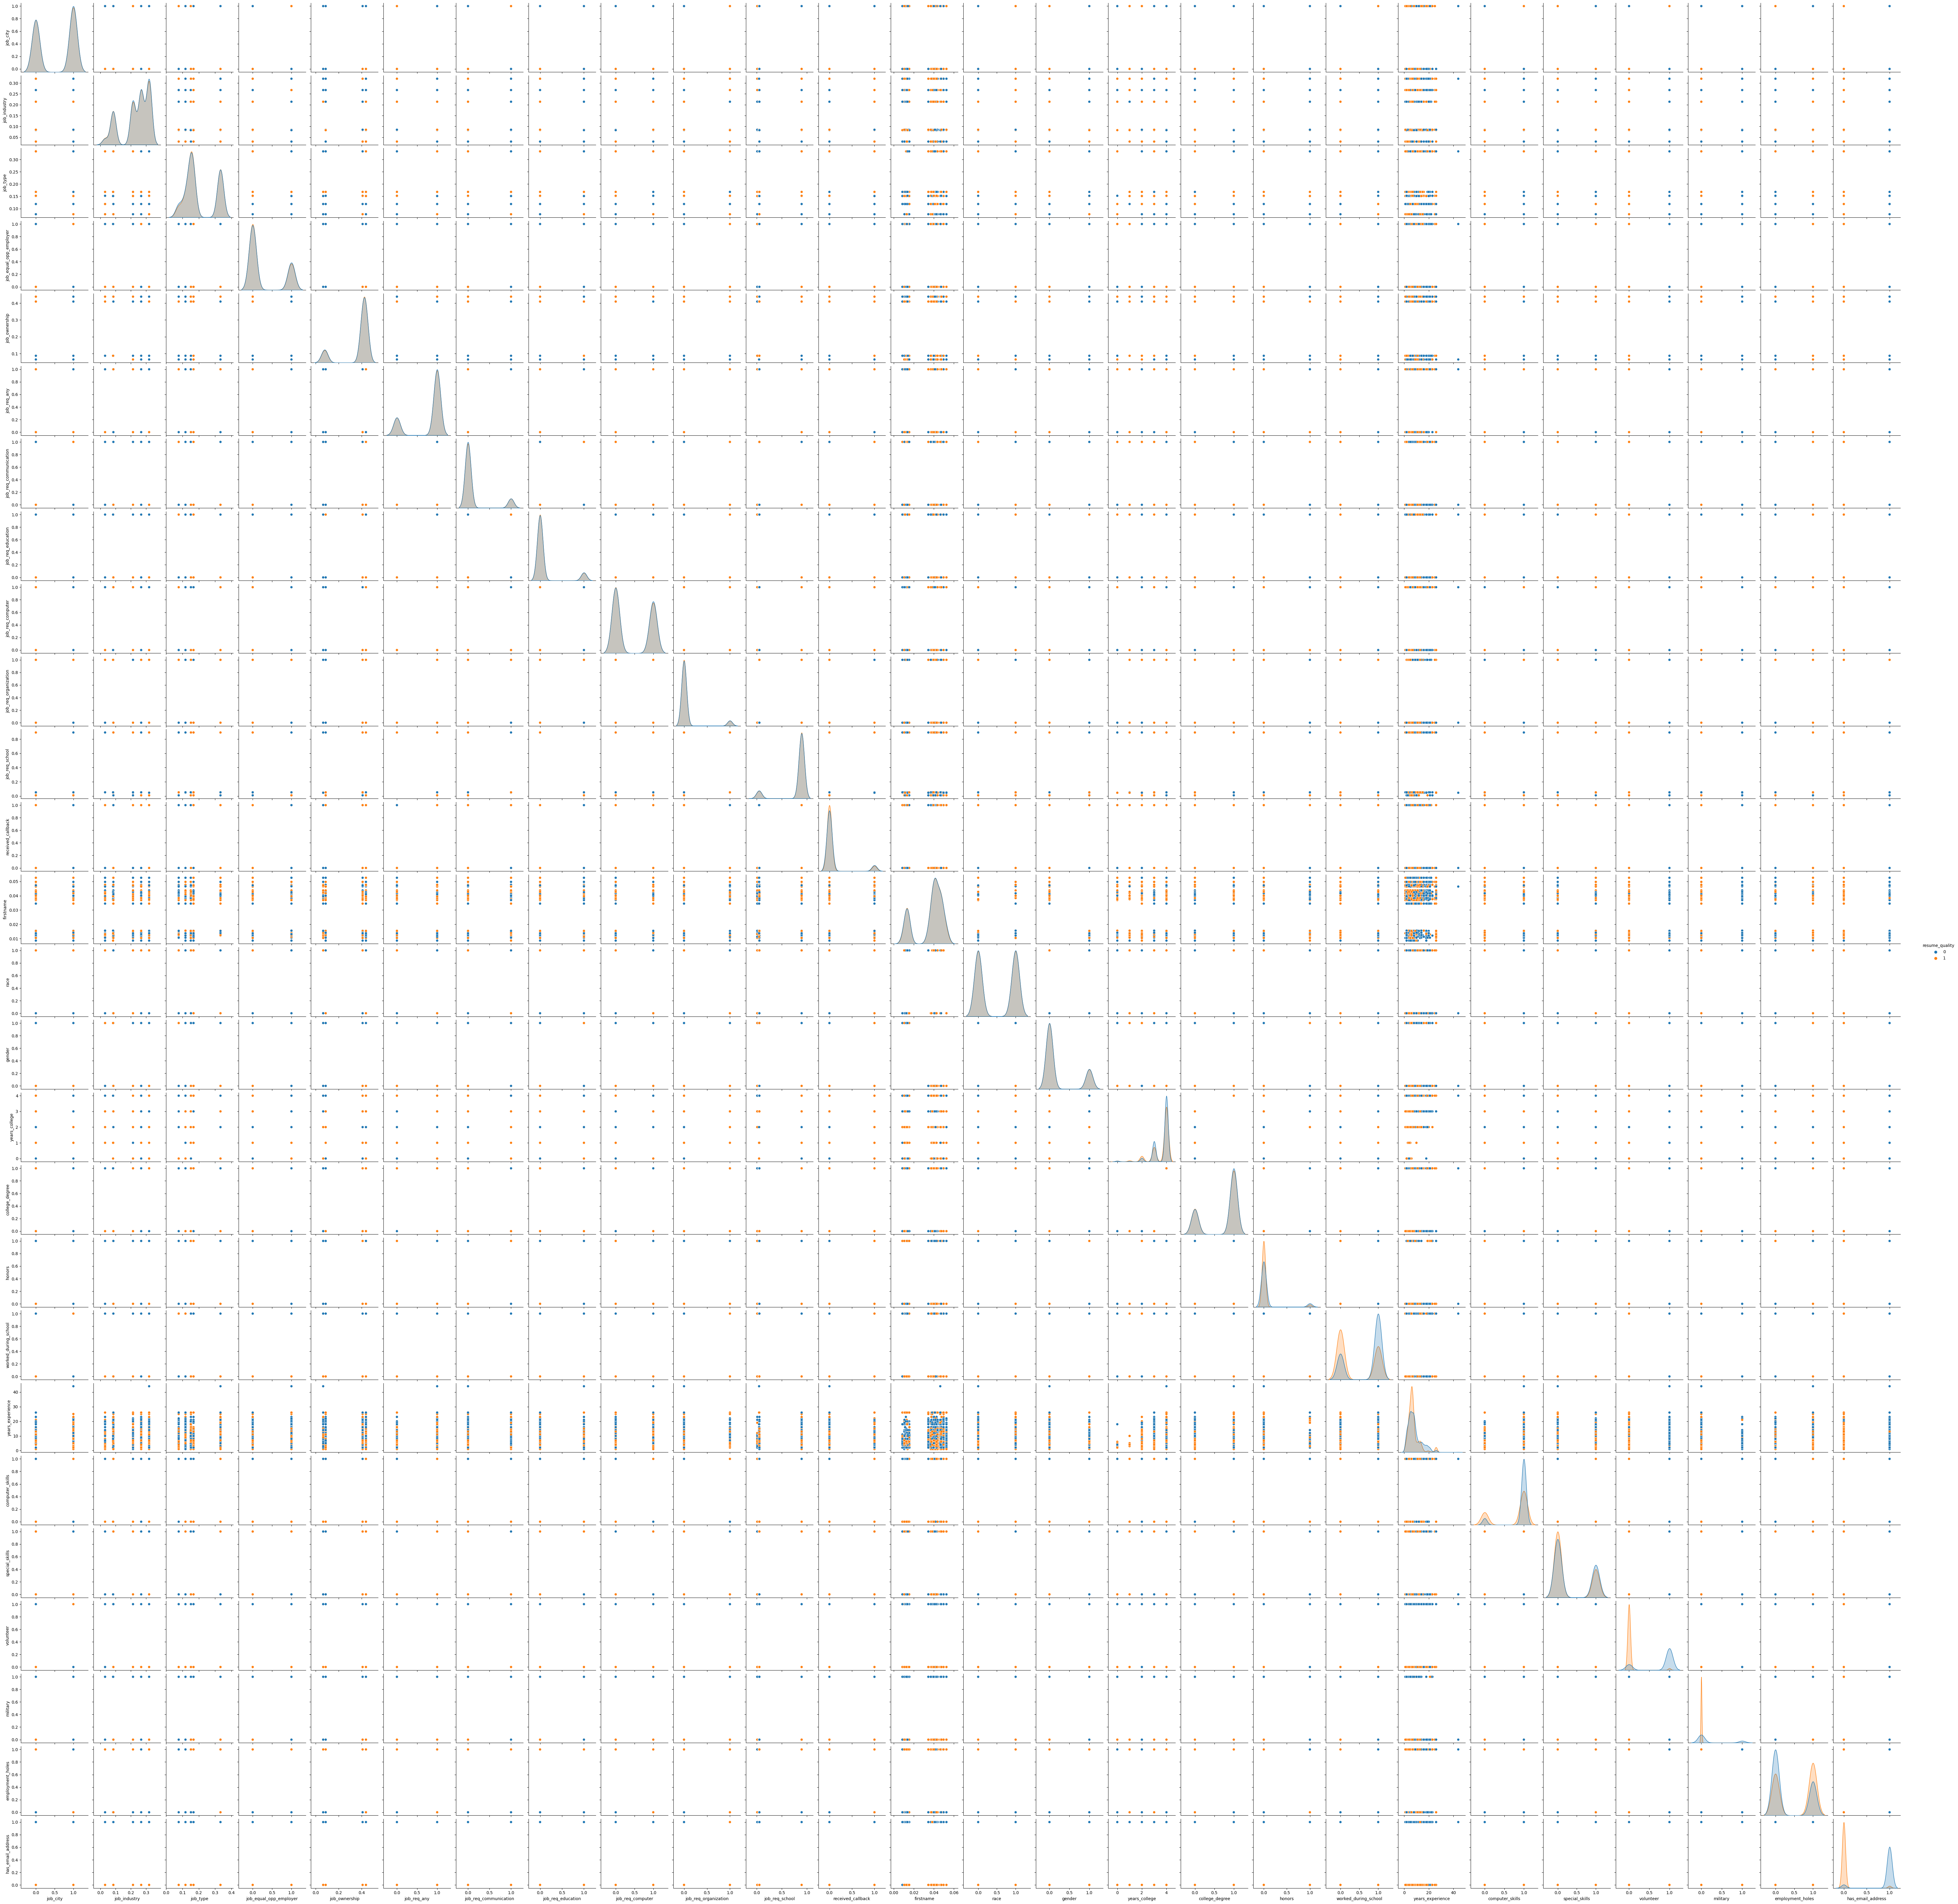

In [18]:
sns.pairplot(df,hue='resume_quality')
plt.show()

HeatMap

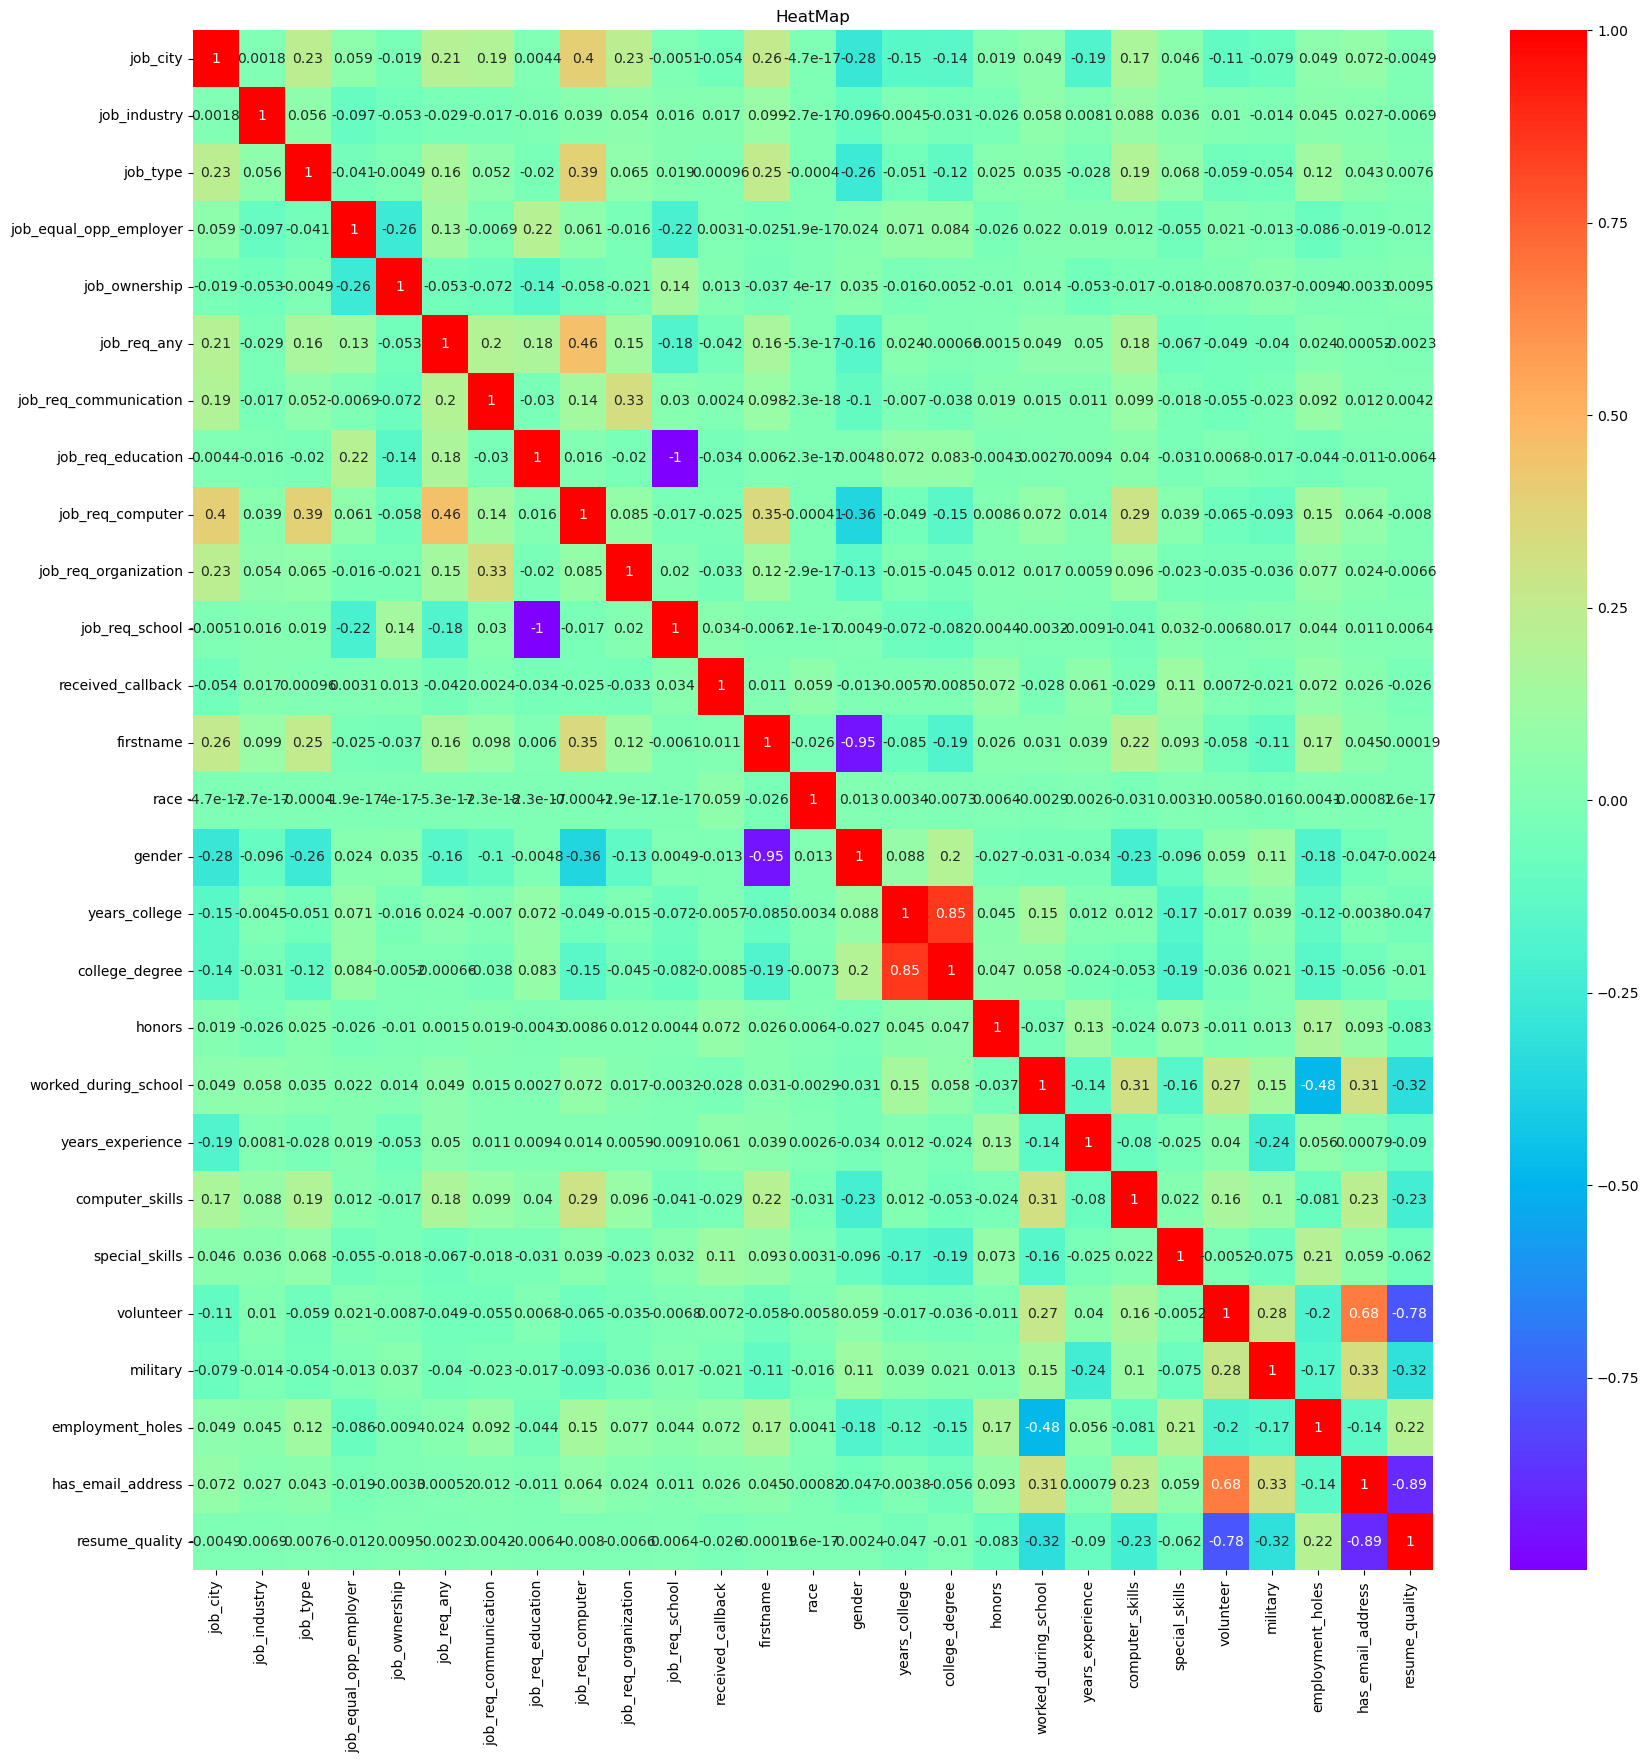

In [19]:
Corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(Corr,annot=True,cmap='rainbow')
plt.title('HeatMap')
plt.show()

# Train & Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.iloc[:,:-1]
X

,job_city,job_industry,job_type,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,...,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address
0,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,1,0,0,6,1,0,0,0,1,0
1,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,0,1,6,1,0,1,1,0,1
2,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,1,0,1,6,1,0,0,0,0,0
3,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,0,0,6,1,1,1,0,1,1
4,1,0.319918,0.332854,1,0.065298,1,0,0,1,1,...,0,0,1,22,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,0,0.085010,0.332854,0,0.438193,1,0,0,1,0,...,0,0,0,1,1,1,0,0,1,0
4866,0,0.319918,0.152156,0,0.409035,0,0,0,0,0,...,1,0,1,6,1,0,0,0,0,0
4867,0,0.319918,0.152156,0,0.409035,0,0,0,0,0,...,1,0,1,8,1,0,1,0,0,1
4868,0,0.319918,0.152156,0,0.409035,0,0,0,0,0,...,1,0,1,2,1,0,1,1,0,1


In [22]:
y = df.iloc[:,-1:]
y

,resume_quality
0,1
1,0
2,1
3,0
4,0
...,...
4865,1
4866,1
4867,0
4868,0


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
DT = DecisionTreeClassifier()

In [26]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

# Prediction

In [27]:
y_hat = DT.predict(X_test)

# Model Evaluation

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [29]:
print(accuracy_score(y_test,y_hat))

0.9825462012320328


In [30]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       468
           1       0.99      0.98      0.98       506

    accuracy                           0.98       974
   macro avg       0.98      0.98      0.98       974
weighted avg       0.98      0.98      0.98       974



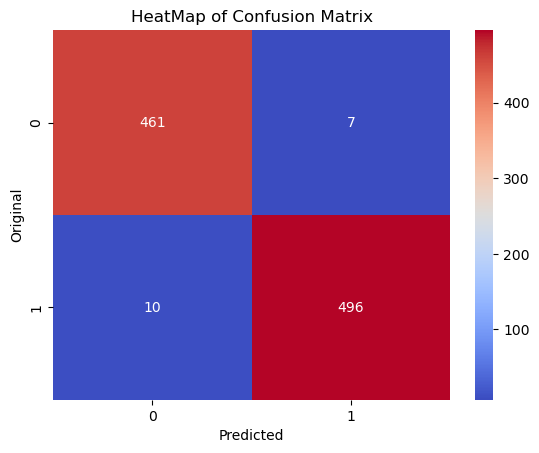

In [32]:
con = confusion_matrix(y_test,y_hat)

sns.heatmap(con,annot=True,fmt='d',cmap='coolwarm')
plt.title('HeatMap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Original')
plt.show()